## Brownian Motion

The purpose of this notebooks is to review and illustrate the main properties of the Brownian motion.

#### Contents

- Definition
- Simulation
- Long Time Behaviour

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns 
sns.set(style="whitegrid")

%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

## Definition

**Definition** A standard Brownian motion or Weiner process is a stochastic process $W =\{W_t, t\geq 0\}$ characterised by the following properties:
1. $W_0 = 0$
2. $W_t-W_s \sim N(0, t-s),$ for any $0\leq s \leq t$
3. $W_t$ has independent increments
4. $W_t$ is almost surely continuous.

The definition implies that  each marginal distribution $W_t$ is normally distributed with $E[W_t] = 0$, and $Var[W_t]=t$. So, we can simulate it by using *norm* from *scipy* wih location and scale parameters 0 and t, respectively.

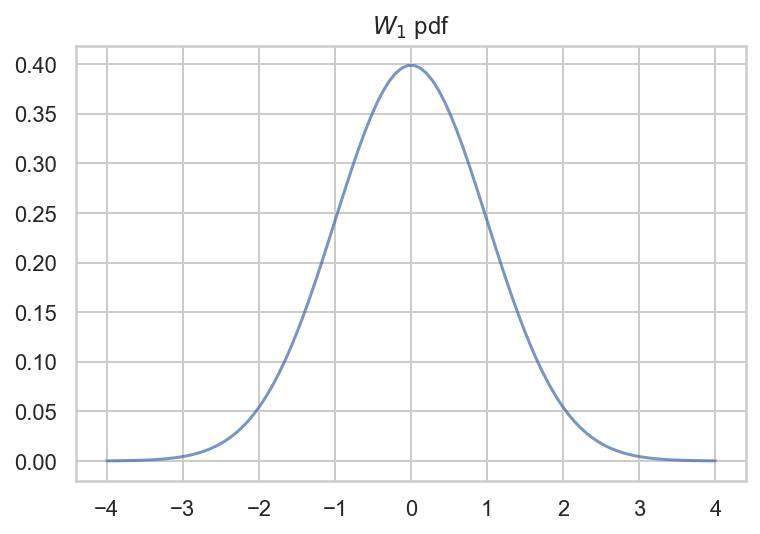

In [3]:
from scipy.stats import norm

t = 1
Wt = norm(loc=0, scale= np.sqrt(t))
x = np.linspace(-4, 4,100)
plt.plot(x, Wt.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={t:.2f}')
plt.title(f'$W_1$ pdf')
plt.show()


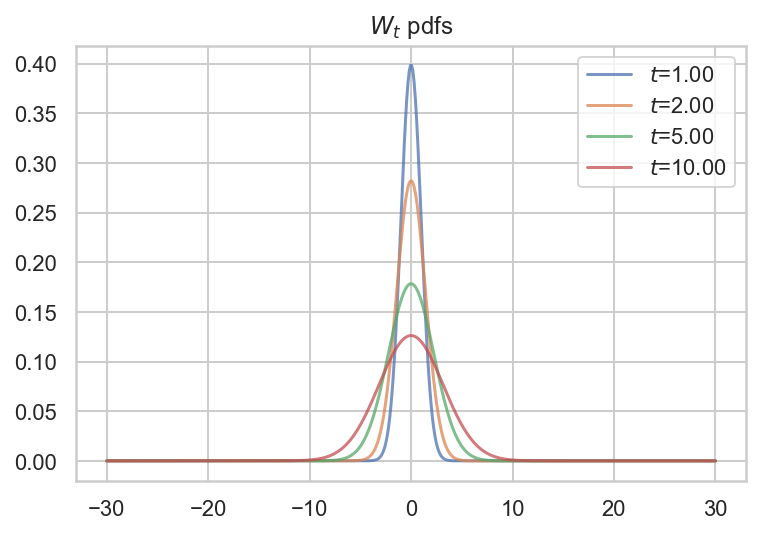

In [4]:
fig, ax1 = plt.subplots(1, 1)
for t in [1,2,5, 10]:
    Wt_variable = norm(loc=0, scale= np.sqrt(t))
    x = np.linspace(-30, 30, 500)
    ax1.plot(x, Wt_variable.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$t$={t:.2f}')
ax1.legend()
plt.title('$W_t$ pdfs')
plt.show()

### Brownian Motion Simulation

In [5]:
def get_times(t0=0.0, T=1.0, steps=30):

    dt = (T-t0)/steps
    times = np.arange(t0, T+dt, dt)
    return times

In [6]:
np.random.seed(123)

ts = get_times(t0=0, T=10, steps=200)

n = len(ts)
dt = (ts[n-1] - ts[0])/n
increments = norm.rvs(loc=0, scale=np.sqrt(dt), size=n-1)
increments = np.insert(increments, 0, 0)
ws = increments.cumsum()

ws[:10]

array([ 0.        , -0.24214976, -0.01969199,  0.04342632, -0.29255251,
       -0.42160922, -0.05325652, -0.59452701, -0.69019591, -0.407829  ])

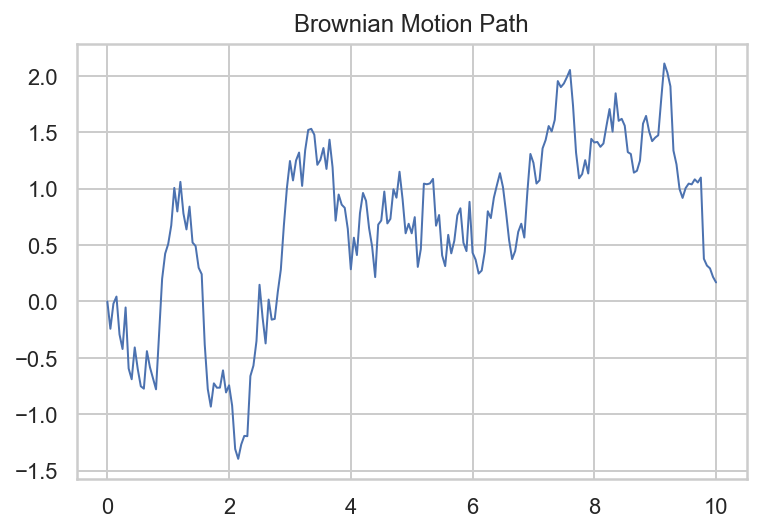

In [7]:
plt.plot(ts, ws, '-', lw=1)
plt.title('Brownian Motion Path')
plt.show()

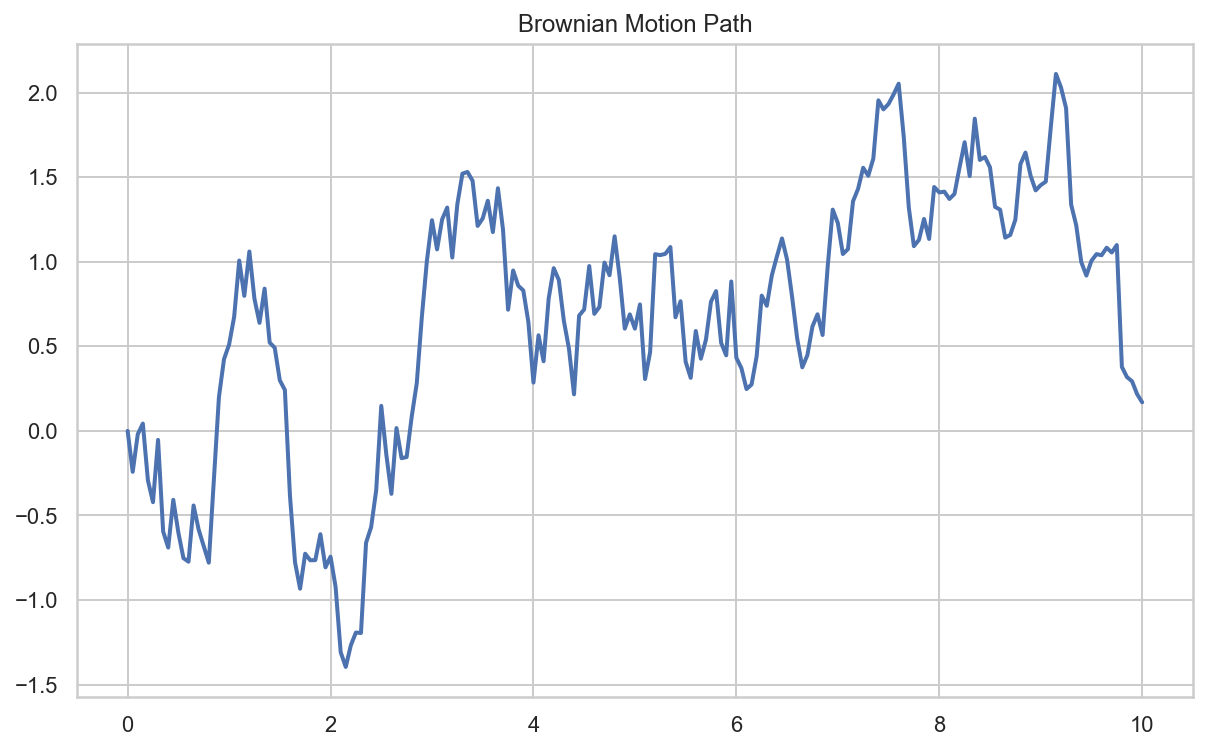

In [8]:
plt.figure(figsize=(10,6))
plt.plot(ts, ws, '-', lw=2)
plt.title('Brownian Motion Path')
plt.show()

In [9]:
def get_brownian_path(ts, bt0=0):

    n = len(ts)
    dt = (ts[n-1] - ts[0])/n
    increments = norm.rvs(loc=0, scale=np.sqrt(dt), size=n-1)
    increments = np.insert(increments, 0, bt0)
    bs = increments.cumsum()

    return bs

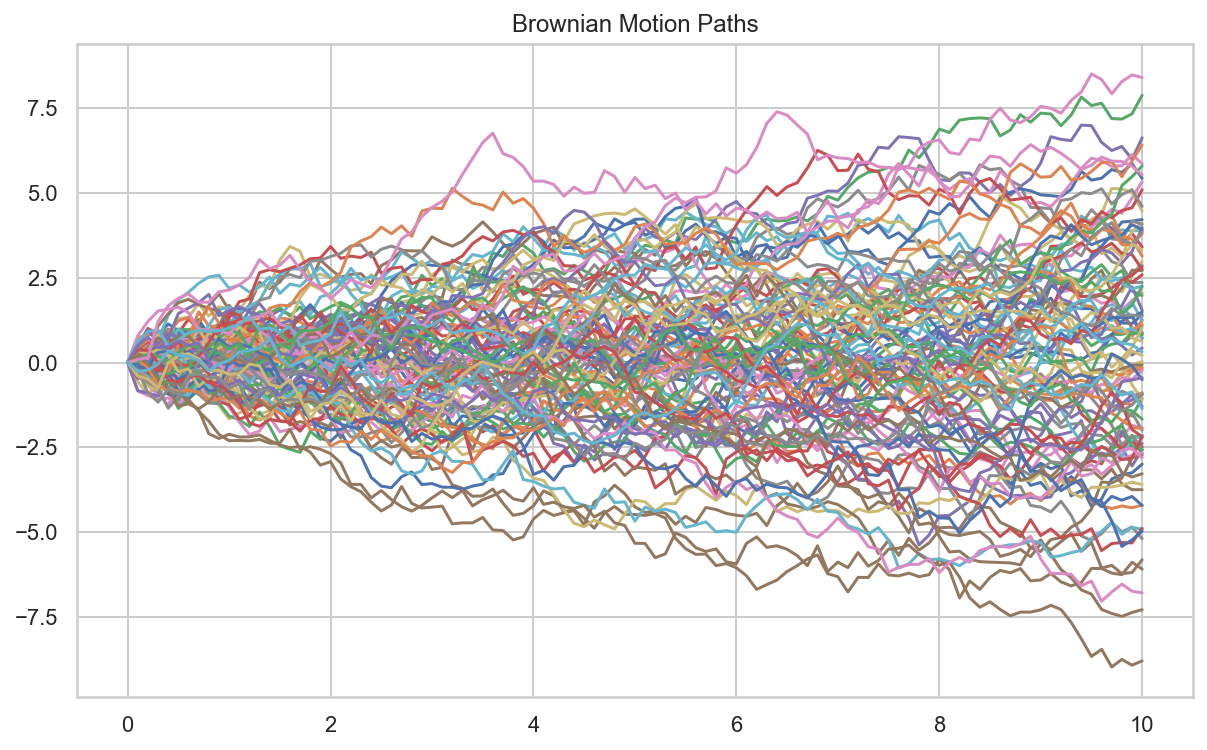

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ts = get_times(T=10, steps=100)
for m in range(100):
    bms = get_brownian_path(ts)
    ax.plot(ts, bms, '-', lw=1.5)
plt.title('Brownian Motion Paths')
plt.show()


## Long Time Behaviour

- Almost surely $$\lim_{t \rightarrow \infty} \frac{W_t}{t}  = 0.$$ This property is the analogous of the Law of Large Numbers and sometimes is referred as such.

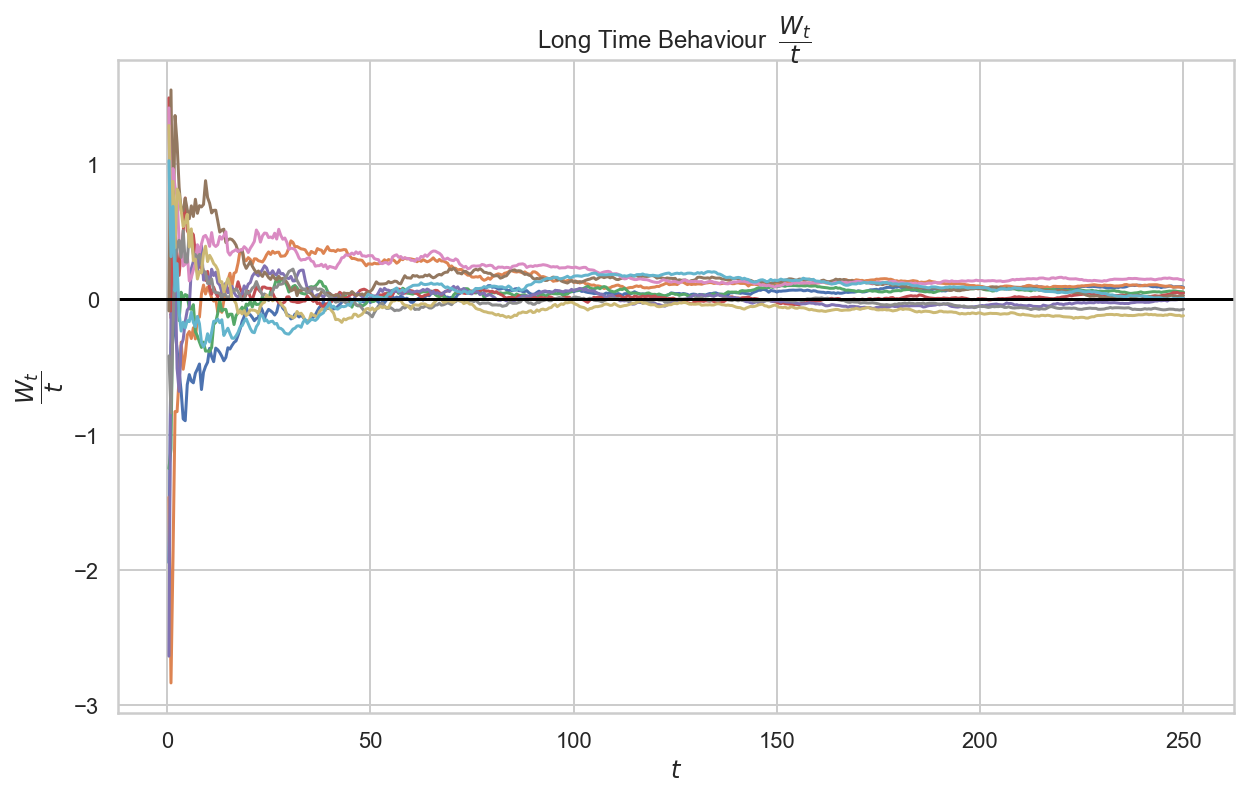

In [11]:
ts = get_times(T=250, steps=500)
plt.figure(figsize=(10, 6))
for _ in range(10):
    bms = get_brownian_path(ts)
    plt.plot(ts[1:], bms[1:]/ts[1:], '-', lw=1.5)

plt.axhline(y=0, lw=1.5, color='black')
plt.title('Long Time Behaviour  $\dfrac{W_t}{t}$ ')
plt.xlabel('$t$')
plt.ylabel('$\dfrac{W_t}{t}$')
plt.show()

## Reflection Principle

If $W_t$ is a Brownian motion andn $a>0$, then 
\begin{equation}
P\left( \sup_{0\leq s  \leq t} W_s \geq a \right) = 2P(W_t\geq a)
\end{equation}

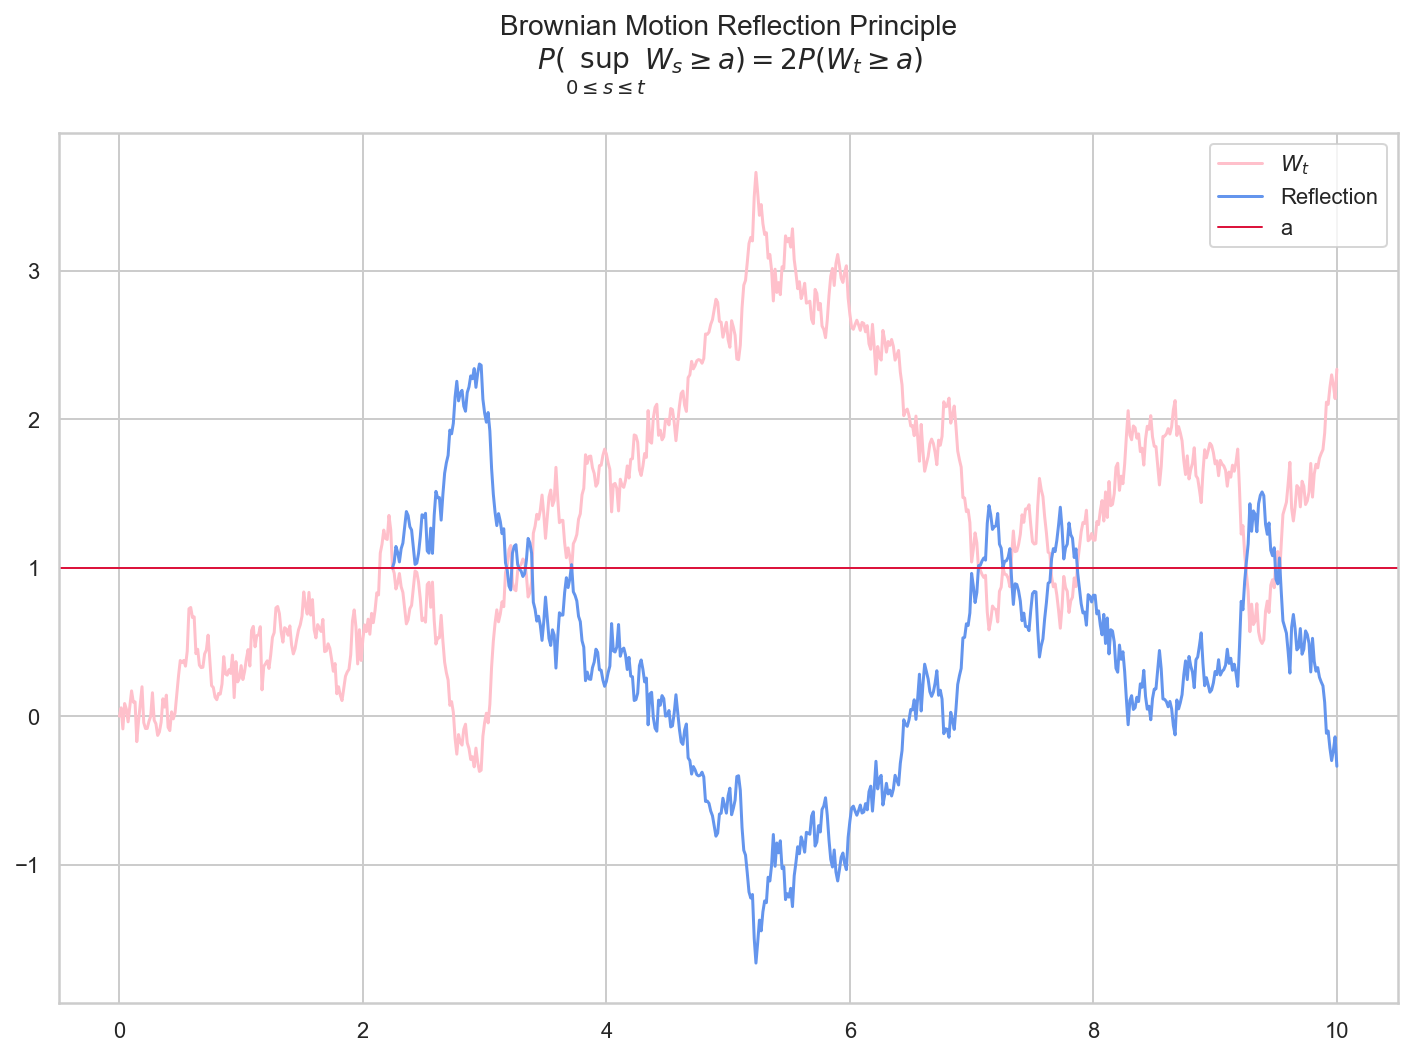

In [12]:
np.random.seed(1234)
ts = get_times(T=10, steps=700)
bms = get_brownian_path(ts)

a = 1.0
fht = np.where(np.isclose(bms, a, rtol=0.01))[0][0]
plt.figure(figsize=(12, 8))
plt.plot(ts, bms, '-', lw=1.5, color='pink', label="$W_t$")
plt.plot(ts[fht:], -bms[fht:] + 2*a, '-', lw=1.5, color='cornflowerblue', label='Reflection')
plt.axhline(y=a, lw=1, color='crimson', label='a')
plt.title(
    'Brownian Motion Reflection Principle\n $P(\sup_{0\leq s  \leq t} W_s \geq a ) = 2P(W_t\geq a)$ \n', fontsize=14)
plt.legend()
plt.show()

